Introduction

The Micro credit loan prediction data set that we are analyzing is a data set of a telecome industry.They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

I will build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the customer is a non defaulter and  while, Label ‘0’ indicates that the customer is a defaulter.

The dataset used in this project Micro_credit_loan.csv that contains 209593 instances with 37 features.


In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Uploading data set

In [2]:
df=pd.read_csv("Micro_credit_loan.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


 Dataset contains 209593 instances with 37 features.

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

I am droping columns Unnamed,msisdn,pcircle and pdate.
columns unnamed is an repetition of serial number.
msisdn is customer mobile number and pdate is date both of the columns will not contribute any value while predicting the model accuracy.
pcircle have same value in each rows so i decided to remove it.

In [4]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [5]:
df.drop(['msisdn'], axis='columns', inplace=True)

In [6]:
df.drop(['pdate'], axis='columns', inplace=True)

In [7]:
df.drop(['pcircle'], axis='columns', inplace=True)

In [8]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [9]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [10]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
dfcor=df.corr() 
dfcor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


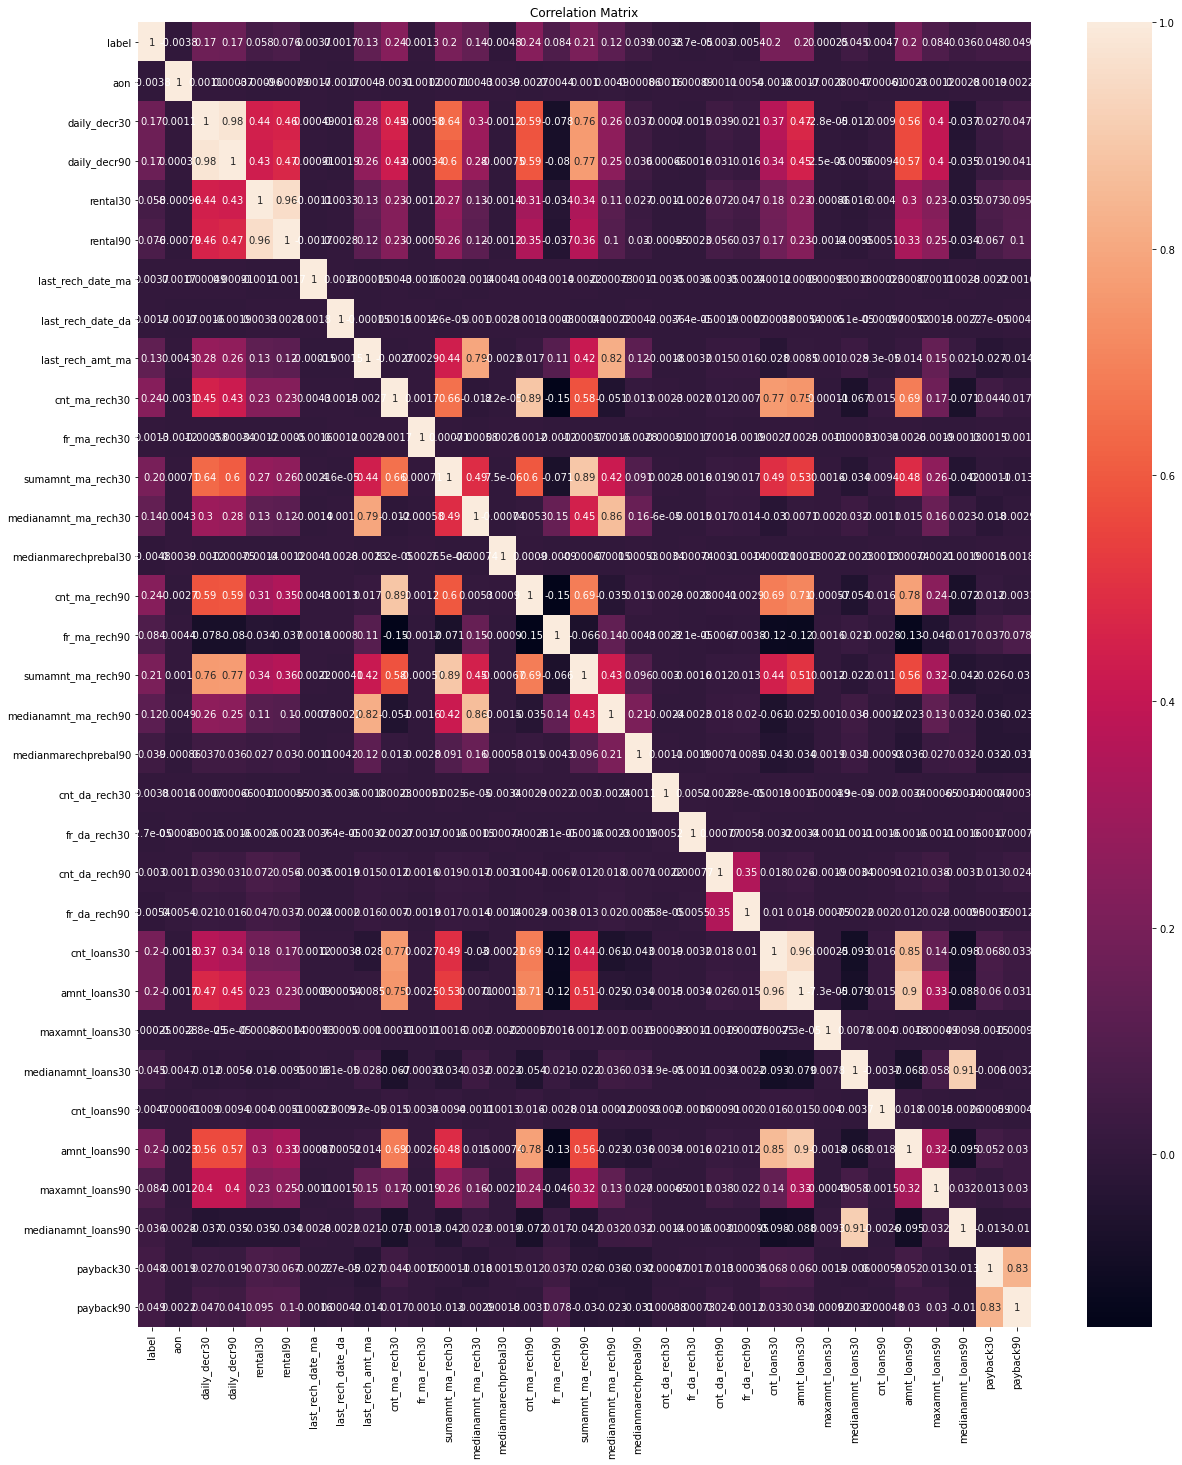

In [12]:
plt.figure(figsize=(20,24))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
corr_matrix=df.corr()

In [14]:
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

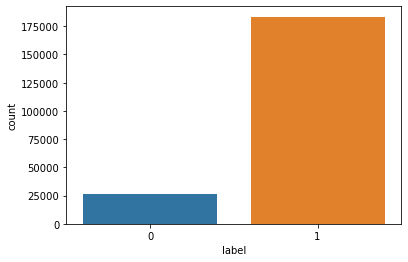

In [15]:
sns.countplot(df.label)

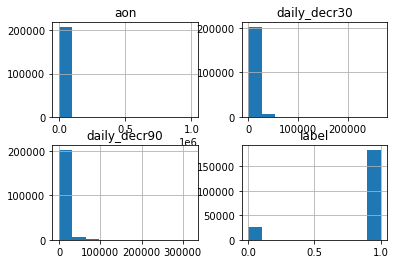

In [16]:
hist = df.iloc[:,0:4].hist()

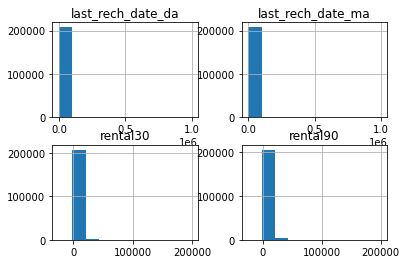

In [17]:
hist = df.iloc[:,4:8].hist()

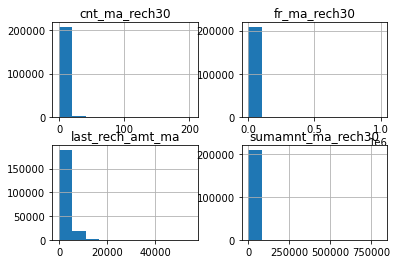

In [18]:
hist = df.iloc[:,8:12].hist()

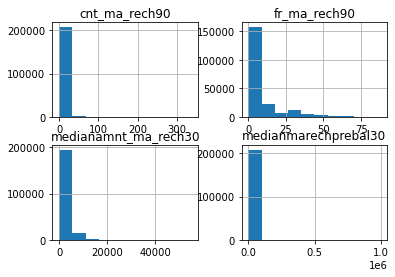

In [19]:
hist = df.iloc[:,12:16].hist()

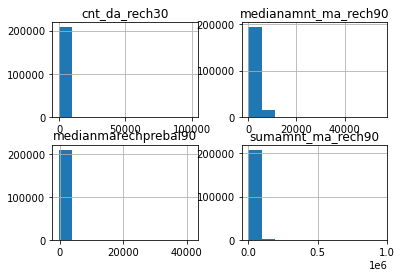

In [20]:
hist = df.iloc[:,16:20].hist()

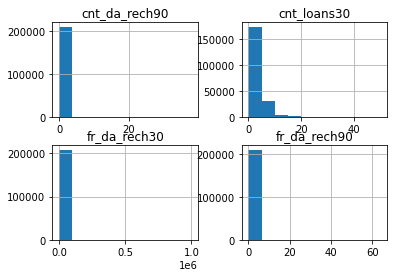

In [21]:
hist = df.iloc[:,20:24].hist()

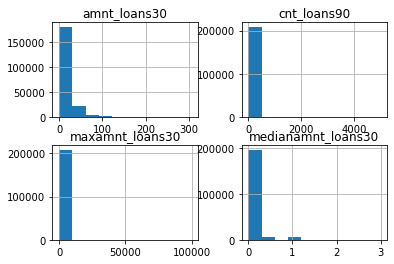

In [22]:
hist = df.iloc[:,24:28].hist()

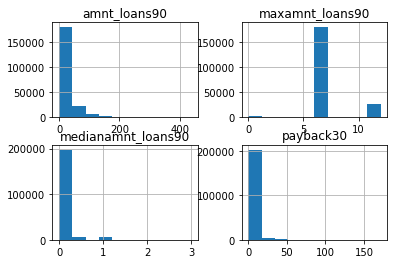

In [23]:
hist = df.iloc[:,28:32].hist()

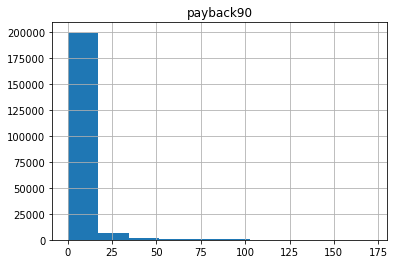

In [24]:
hist = df.iloc[:,32:36].hist()

label                      AxesSubplot(0.125,0.772143;0.0945122x0.107857)
aon                     AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
daily_decr30            AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
daily_decr90            AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
rental30                AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
rental90                AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
last_rech_date_ma       AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
last_rech_date_da          AxesSubplot(0.125,0.642714;0.0945122x0.107857)
last_rech_amt_ma        AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
cnt_ma_rech30           AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
fr_ma_rech30            AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
medianamnt_ma_rech30    AxesSubplot(0.692073,0.642714;0.0945122x0.107857)
medianmarechprebal30    AxesSubplot(0.

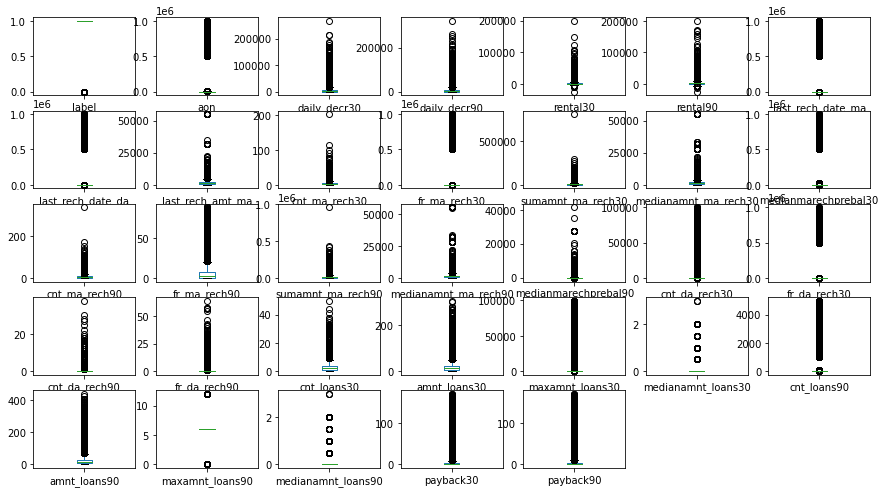

In [25]:
df.plot(kind='box',subplots=True, layout=(6,7), figsize= (15,10))

In [26]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [27]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(209593, 33)
(161465, 33)


In [29]:
loss_percent=(209593-161465)/209593*100
print(loss_percent)

22.962598941758554


In [30]:
# spliting the independent and target variables in x and y
x=df.drop("label",axis=1)
y=df["label"]

In [31]:
x.skew() #checking skewness

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [32]:
from sklearn.preprocessing import power_transform   #removing skewness
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [33]:
x=df_new

In [34]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.556347,0.393236,-0.101998,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,0.924658,1.454951,1.182431,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.011773,0.393236,1.182431,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


In [ ]:
Scalling dataset with the help of MinMax scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(x) 
x.loc[:,:] = scaled_values

Training testeing validating and Hyper tunning of model

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight={0:1,1:10})

In [68]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y), y)

In [69]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
pred=LR.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9333333333333333
[[27  0]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.33      0.50         3

    accuracy                           0.93        30
   macro avg       0.97      0.67      0.73        30
weighted avg       0.94      0.93      0.92        30



In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[27  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[27  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [72]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9
[[27  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.00      0.00      0.00         3

    accuracy                           0.90        30
   macro avg       0.45      0.50      0.47        30
weighted avg       0.81      0.90      0.85        30



In [73]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

Cross validation of LogisticRegression model: 0.99


In [74]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

Cross validation of DecisionTree model: 1.0


In [75]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Cross validation of RandomForest model: 0.9800000000000001


In [76]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

Cross validation of SVC model: 0.95


In [77]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [78]:
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [79]:
y_pred_prob

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [80]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [81]:
fpr

array([0., 0., 1.])

In [82]:
tpr

array([0., 1., 1.])

In [83]:
thresholds

array([2., 1., 0.])

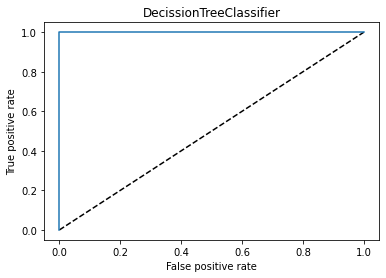

In [84]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecissionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecissionTreeClassifier')
plt.show()

In [85]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))

In [86]:
print(auc_score)

1.0


In [87]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [88]:
y_pred_prob

array([0.18, 0.01, 0.05, 0.08, 0.  , 0.  , 0.7 , 0.05, 0.  , 0.02, 0.01,
       0.11, 0.  , 0.07, 0.06, 0.04, 0.  , 0.  , 0.04, 0.69, 0.16, 0.  ,
       0.  , 0.8 , 0.01, 0.08, 0.01, 0.05, 0.01, 0.02])

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [90]:
fpr

array([0.        , 0.        , 0.        , 0.11111111, 0.18518519,
       0.25925926, 0.37037037, 0.51851852, 0.7037037 , 1.        ])

In [91]:
tpr

array([0.        , 0.33333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [92]:
thresholds

array([1.8 , 0.8 , 0.69, 0.11, 0.08, 0.06, 0.05, 0.02, 0.01, 0.  ])

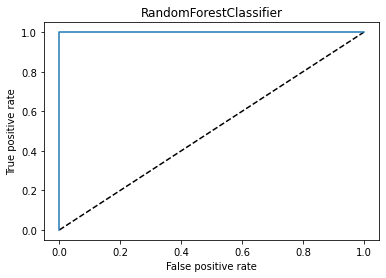

In [93]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [94]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [95]:
print(auc_score)

1.0


In [96]:
y_pred_prob=LR.predict_proba(x_test)[:,1]

In [97]:
y_pred_prob

array([1.03369050e-02, 8.59009556e-03, 1.99037332e-02, 5.48347968e-02,
       5.34173379e-04, 1.14268307e-02, 4.94288612e-01, 6.61082837e-03,
       6.31618459e-03, 3.27754363e-03, 7.96039612e-04, 1.33112315e-03,
       1.23166813e-02, 1.28677382e-02, 4.71459573e-02, 1.71983285e-02,
       1.33611058e-03, 9.41887244e-03, 3.94762139e-02, 4.00036097e-01,
       1.39124979e-04, 3.42071231e-03, 1.02892933e-02, 7.94239937e-01,
       1.16227271e-02, 1.03149276e-01, 9.14630671e-03, 6.04754918e-04,
       1.96130378e-04, 4.96801852e-03])

In [98]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [99]:
fpr

array([0., 0., 0., 1.])

In [100]:
tpr

array([0.        , 0.33333333, 1.        , 1.        ])

In [101]:
thresholds

array([1.79423994e+00, 7.94239937e-01, 4.00036097e-01, 1.39124979e-04])

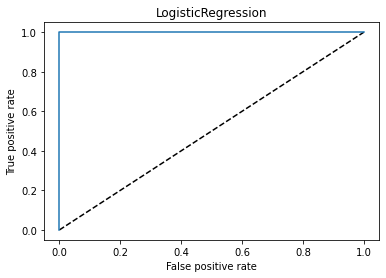

In [102]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

In [103]:
auc_score=roc_auc_score(y_test,LR.predict(x_test))

In [104]:
print(auc_score)

0.6666666666666666


Minimum difference in accuracy,cross validation score and auc curveis for DecisionTreeClassifier so this is our best model

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [109]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [111]:
GCV.best_params_ #Printing the best parameter found by GridSearch

{'criterion': 'gini', 'max_depth': 2}

In [112]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [113]:
accuracy_score(y_test,GCV_pred)

1.0

In [114]:
import joblib
joblib.dump(dt,"micro_credit.csv.obj")

['micro_credit.csv.obj']

In [115]:
p=joblib.load("micro_credit.csv.obj")

In [116]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [117]:
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0
